# Principal Component Analysis on the Statcast Homeruns Data

## By Christopher Hauman
<br>

#### This example is the sequel to my guide on []. You can read more about PCA and see some great visuals [here](http://setosa.io/ev/principal-component-analysis/). This falls under the umbrella of unsupervised machine learning. If you're unfamiliar with this topic, you can learn the basics in my guide on [K-Means Classification on the Iris Dataset with scikit-learnu](https://nbviewer.jupyter.org/github/chrisman1015/Unsupervised-Learning/blob/master/K-Means%20Classification%20on%20the%20Iris%20Dataset%20with%20scikit-learn/K-Means%20Classification%20on%20the%20Iris%20Dataset%20with%20scikit-learn.ipynb).

### Note: This assumes you have basic knowledge of python data science basics. If you don't, or encounter something you're not familiar with, don't worry! You can get a crash course in my guide, [Cleaning MLB Statcast Data using pandas DataFrames and seaborn Visualization](https://nbviewer.jupyter.org/github/chrisman1015/Cleaning-Statcast-Data/blob/master/Cleaning%20Statcast%20Data/Cleaning%20Statcast%20Data.ipynb).
<br>

In [100]:
from sklearn.decomposition import PCA
from scipy.stats import pearsonr

In [101]:
# pandas and numPy for DataFrames and arrays
import pandas as pd
import numpy as np

# pyplot and seaborn for plots
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
# import csv file to df_raw DataFrame
df_hr = pd.read_csv("cleaned_allhr2018.csv", index_col=0)
df2 = df_hr.copy()
df_hr.head()

,home_runs,player_name,total_pitches,pitch_percent,xwoba,xba,launch_speed,launch_angle,spin_rate,velocity,effective_speed,release_extension
0,48,Khris Davis,2514,1.9,1.671,0.861,105.9,27.3,2269.0,89.6,89.01,5.93
1,43,J.D. Martinez,2519,1.7,1.537,0.792,105.0,28.2,2118.0,88.8,88.46,6.05
2,40,Joey Gallo,2348,1.7,1.588,0.806,107.7,29.4,2164.0,88.6,88.14,5.96
3,39,Jose Ramirez,3002,1.3,1.152,0.620,101.3,28.8,2192.0,91.6,91.37,6.09
4,39,Mike Trout,2543,1.5,1.543,0.809,106.5,28.0,2203.0,87.8,87.11,5.90


In [105]:
velo_df = df_hr[['velocity', 'effective_speed']]

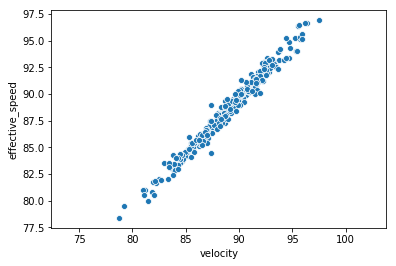

correlation = 0.9882583385513954


In [106]:
# Scatter plot width vs length
sns.scatterplot('velocity','effective_speed', data=velo_df)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(velo_df['velocity'], velo_df['effective_speed'])

# Display the correlation
print('correlation =', correlation)

In [107]:
model = PCA()

pca_features = model.fit_transform(np.array(velo_df))

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

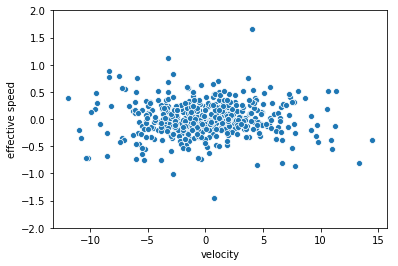

correlation = -5.6764174732599534e-18


In [108]:
sns.scatterplot(x='x', y='y', data=df_transformed , palette="Set1")
plt.xlabel('velocity')
plt.ylabel('effective speed')
plt.ylim(-2,2)
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print('correlation =', correlation)

In [109]:
array_no_name = np.array(df_hr.drop('player_name', axis =1))

In [110]:
# fit pca model to the entire dataset
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(array_no_name)
features = range(pca.n_components_)

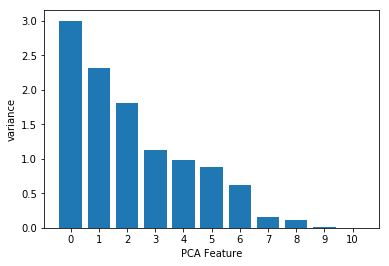

In [111]:
# plot features vs variance
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA Feature')
plt.show()

In [112]:
# Create a PCA model with 2 components: pca
pca = PCA(n_components=6)

# Fit the PCA instance to the scaled samples
pca.fit(array_no_name)

# Transform the scaled samples: pca_features
pca_features = pca.transform(array_no_name)

# Print the shape of pca_features
print(pca_features.shape)

(508, 6)


We can now store these dimension reduced arrays in their own dataframes, one with the player names and one without.

In [115]:
hr_reduced = pd.DataFrame(pca_features)
hr_reduced.columns = ['a','b', 'c', 'd', 'e', 'f']
hr_reduced.head()

,a,b,c,d,e,f
0,1178.136198,-57.000661,25.950992,-1.703247,0.219834,-2.739987
1,1182.891028,94.011795,20.963669,-1.311405,-0.695599,-2.154081
2,1011.931914,47.789403,20.120658,-0.784266,-0.367282,1.039358
3,1665.927117,20.633629,11.667128,-4.701477,-2.253194,-3.919734
4,1206.964703,9.055798,17.097611,0.750327,0.680563,-0.161116


In [118]:
hr_6D = hr_reduced.copy()
hr_6D['player_name'] = df_hr['player_name']
hr_6D.head()

,a,b,c,d,e,f,player_name
0,1178.136198,-57.000661,25.950992,-1.703247,0.219834,-2.739987,Khris Davis
1,1182.891028,94.011795,20.963669,-1.311405,-0.695599,-2.154081,J.D. Martinez
2,1011.931914,47.789403,20.120658,-0.784266,-0.367282,1.039358,Joey Gallo
3,1665.927117,20.633629,11.667128,-4.701477,-2.253194,-3.919734,Jose Ramirez
4,1206.964703,9.055798,17.097611,0.750327,0.680563,-0.161116,Mike Trout
